Este breve tutorial explica algunos de los conceptos relacionados con la librería `scikit-learn` de python. 

# ¿Qué es python?

- Python es un lenguaje de programación interpretado.
- Su nombre proviene de la afición de su creador original, [Guido van Rossum](https://es.wikipedia.org/wiki/Guido_van_Rossum), por los humoristas británicos [Monty Python](https://es.wikipedia.org/wiki/Monty_Python).
- Características:
  - Programación orientada a objetos
  - Programación imperativa
  - Programación funcional.
  - Es multiplataforma y posee una licencia abierta.

# Entornos de desarrollo para python

- Entornos de desarrollo para Python
  - [Sublime Text](http://www.sublimetext.com/)
  - [PyCharm](https://www.jetbrains.com/pycharm/)
  - [Spyder](https://github.com/spyder-ide/spyder)

# `scikit-learn`

- Librería que proporciona un amplio conjunto de algoritmos de aprendizaje supervisado y no supervisado a través de una consistente interfaz en `python`.
- Publicado bajo licencia BSD y distribuido en muchos sistemas Linux, favorece el uso comercial y educacional.
- Esta librería se ha construido sobre [`SciPy`](http://www.scipy.org/) (*Scientific Python*), que debe ser instalada antes de utilizarse, incluyendo:
  - [**NumPy**](http://www.numpy.org/)
  - [**Matplotlib**](http://matplotlib.org/)
  - [SymPy](https://simpy.readthedocs.org/en/latest/)
  - [**Pandas**](http://pandas.pydata.org/)

# Características de `scikit-learn`

- Esta librería se centra en el modelado de datos y no en cargar y manipular los datos, para lo que utilizaríamos [NumPy](http://www.numpy.org/) y [Pandas](http://pandas.pydata.org/). Algunas cosas que podemos hacer con `scikit-learn` son:
  - *Clustering*.
  - Validación cruzada.
  - *Datasets* de prueba.
  - Reducción de la dimensionalidad.
  - *Ensemble methods*.
  - *Feature selection*.
  - *Parameter tuning*.

Las principales ventajas de `scikit-learn` son las siguientes:
  - Interfaz consistente ante modelos de aprendizaje automático.
  - Proporciona muchos parámetros de configuración.
  - Documentación excepcional.
  - Desarrollo muy activo.
  - Comunidad.

Jupyter Notebooks (libros de notas o cuadernos Jupyter)
==================

* Puedes ejecutar un `Cell` (celda) pulsando ``[shift] + [Enter]`` o presionando el botón `Play` en la barra de herramientas.

![](images/ipython_run_cell.png)

* Puedes obtener ayuda sobre una función u objeto presionando ``[shift] + [tab]`` después de los paréntesis de apertura ``function(``

![](images/ipython_help-1.png)

* También puedes obtener la ayuda ejecutando ``function?``

![](images/ipython_help-2.png)

# Importación de librerías

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn import preprocessing

Con estas líneas, importamos la funcionalidad necesaria para el ejemplo. `pandas` nos permitirá leer los datos, `numpy` nos va a permitir trabajar con ellos de forma matricial, `matplotlib` nos permite hacer representaciones gráficas y, de la librería `scikit-learn`, en este caso, utilizaremos un método de clasificación basado en los vecinos más cercanos y algunas funciones de preprocesamiento.

In [5]:
nombre_variables = ['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'clase']

y leemos el dataset con:

In [6]:
iris = pd.read_csv('data/iris.csv', names = nombre_variables)

`iris` es un objeto de la clase [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) de `pandas`. También podríamos haber obviado el nombre de las columnas estableciendo `header=None`, de forma que `read_csv` le hubiera asignado un nombre por defecto.

## matplotlib

Una parte muy importante del aprendizaje automático es la visualización de datos. La herramienta más habitual para esto en Python es [`matplotlib`](http://matplotlib.org). Es un paquete extremadamente flexible y ahora veremos algunos elementos básicos.

Ya que estamos usando los libros (*notebooks*) Jupyter, vamos a usar una de las [funciones mágicas](https://ipython.org/ipython-doc/3/interactive/magics.html) que vienen incluidas en IPython, el modo "*matoplotlib inline*", que dibujará los *plots* directamente en el libro.

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

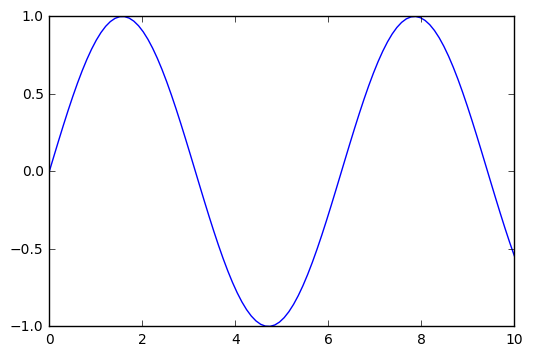

In [9]:
# Dibujar una línea
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x));

En Python, por norma general, no es necesario utilizar ';' al finalizar cada sentencia, no obstante al dibujar *inline* una gráfica podemos usar ';' para evitar la salida real de *matplotlib* y que se muestre solamente la figura.
Prueba a ejecutar la la caja anterior quitando el ';' a la última sentencia. ¿Qué diferencia aprecias?

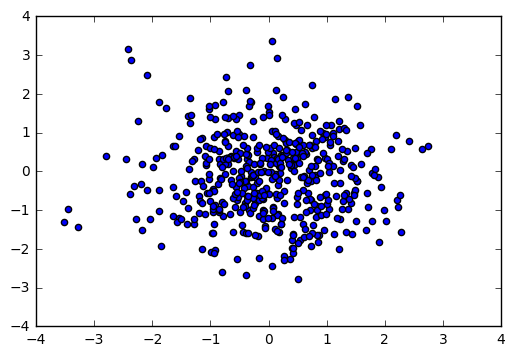

In [11]:
# Dibujar un scatter (dispersión)
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y);

In [12]:
# Mostrar imágenes usando imshow
# - Tener en cuenta que el origen por defecto está arriba a la izquierda

x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

El método de numpy *np.newaxis* crea un nuevo eje. Prueba a imprimir la dimensión de *x* e *y* usando el método de numpy *.shape*, ¿ves la diferencia?

(100, 100)


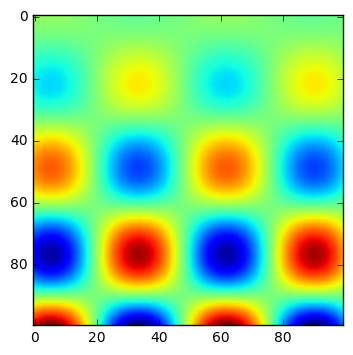

In [21]:
im = y * np.sin(x) * np.cos(y)
print(im.shape)

plt.imshow(im);

¿Qué estamos viendo en esta imagen?

No es más que un corte transversal del cruce de la función seno y la función coseno.

Si tienes dudas, siempre puedes [preguntarle a Google](https://www.google.es/search?dcr=0&ei=cGr8WbKFNsmTa_b1n6AI&q=sin%28x%29*cos%28y%29+from+-6+to+6&oq=sin%28x%29*cos%28y%29+from+-6+to+6&gs_l=psy-ab.3...5574.8328.0.8486.6.5.1.0.0.0.79.355.5.5.0....0...1.1.64.psy-ab..0.0.0....0.3Kq-XpUPDRs)


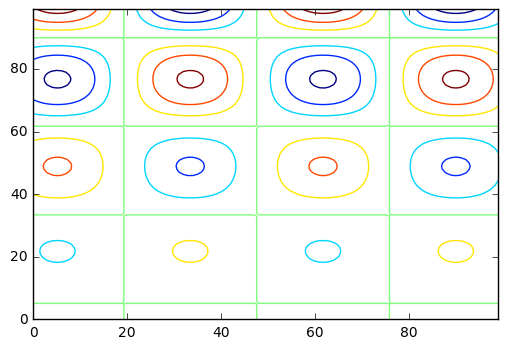

In [22]:
# Hacer un diagrama de curvas de nivel (contour plot)
# - El origen aquí está abajo a la izquierda
plt.contour(im);

In [ ]:
# El modo "notebook" en lugar de inline permite que los plots sean interactivos
%matplotlib notebook
# Plot en 3D
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y.ravel())
ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.viridis, cstride=2, rstride=2, linewidth=0);

Hay muchísimos tipos de gráficos disponibles. Una forma útila de explorarlos es mirar la [galería de matplotlib](http://matplotlib.org/gallery.html).

Puedes probar estos ejemplos fácilmente en el libro de notas: simplemente copia el enlace ``Source Code`` de cada página y pégalo en el libro usando el comando mágico ``%load``.
Por ejemplo:

In [ ]:
%load http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py

# Ejemplos de uso con el *dataset* `iris`

Vamos a utilizar un ejemplo típico en *machine learning* que es la base de datos `iris`.  En esta base de datos hay tres clases a predecir, que son tres especies distintas de la flor iris, de manera que, para cada flor, se extraen cuatro medidas o variables de entrada (longitud y ancho de los pétalos y los sépalos, en cm). Las tres especies a distinguir son iris *setosa*, iris *virginica* e iris *versicolor*.

## Lectura de datos

Como ya hemos comentado, para la lectura de datos haremos uso de [Pandas](http://pandas.pydata.org/). Esta librería tiene un método `read_csv` que nos va a permitir leer los datos desde un fichero de texto `csv`.

El método `read_csv` de `pandas` permite dos modos de trabajo: que el propio fichero csv tenga una fila con los nombres de las variables o que nosotros especifiquemos los nombres de las variables en la llamada. En este caso, vamos a utilizar la segunda aproximación. De esta forma, creamos un *array* con los nombres de las variables:

In [28]:
nombre_variables = ['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'clase']

y leemos el dataset con:

In [29]:
iris = pd.read_csv('data/iris.csv', names = nombre_variables)

`iris` es un objeto de la clase [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) de `pandas`. También podríamos haber obviado el nombre de las columnas estableciendo `header=None`, de forma que `read_csv` le hubiera asignado un nombre por defecto.

## Inspección de datos

Antes de nada, es conveniente realizar una pequeña **inspección** de los datos. Si simplemente queremos ver la cabecera del dataset, podemos utilizar el método `head(n)`, que devuelve un DataFrame incluyendo los primeros `n` patrones:

In [ ]:
print(iris.head(9))

Estos datos tienen cuatro dimensiones, pero podemos visualizar una o dos de las dimensiones usando un histograma o un scatter. Primero, activamos el *matplotlib inline mode*:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
variable_x = 3
colors = ['blue', 'red', 'green']
iris_target_names = np.unique(iris['clase'])

for indice, color in zip(range(len(iris_target_names)), colors):
    patrones = (iris['clase']==iris_target_names[indice])
    plt.hist(iris.values[patrones, variable_x], label=iris_target_names[indice], color=color)

plt.xlabel(nombre_variables[variable_x])
plt.legend(loc='upper right')
plt.show()

In [ ]:
variable_x = 3
variable_y = 2

colors = ['blue', 'red', 'green']

for indice, color in zip(range(len(iris_target_names)), colors):
    patrones = (iris['clase']==iris_target_names[indice])
    plt.scatter(iris.values[patrones, variable_x], 
                iris.values[patrones, variable_y],
                label=iris_target_names[indice],
                c=color)

plt.xlabel(nombre_variables[variable_x])
plt.ylabel(nombre_variables[variable_y])
plt.legend(loc='upper left')
plt.show()

### Matrices scatterplot

En lugar de realizar los plots por separado, una herramienta común que utilizan los analistas son las **matrices scatterplot**.

Estas matrices muestran los scatter plots entre todas las características del dataset, así como los histogramas para ver la distribución de cada característica.

In [ ]:
import pandas as pd
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(iris['clase'])
clases_numeros = le.transform(iris['clase'])

iris_df = pd.DataFrame(iris[nombre_variables], columns=nombre_variables)
pd.plotting.scatter_matrix(iris_df, c=clases_numeros, figsize=(8, 8));

## Manejo de objetos `DataFrame` y matrices numpy (`ndarray`)

Los [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) son objetos que representan a los *datasets* con los que vamos a operar. Permiten realizar muchas operaciones de forma automática, ayudando a transformar las variables de forma muy cómoda. Internamente, el dataset se guarda en un array bidimensional de `numpy` (clase [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)). El acceso a los elementos de un [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) es algo más simple si utilizamos su versión [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), para lo cual simplemente tenemos que utilizar el atributo `values`:

In [ ]:
print(iris['longitud_sepalo'])

In [ ]:
print(iris[nombre_variables[0]])

In [ ]:
iris_array = iris.values
print(iris_array[:,0])

La sintaxis de indexación en un [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) es la siguiente:
- `array[i,j]`: accede al valor de la fila `i` columna `j`.
- `array[i:j,k]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y a la columna `k`.
- `array[i:j,k:l]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y a las columnas desde la `k` hasta la `l`.
- `array[i:j,:]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y **todas** las columnas.
- `array[:,i:j]`: devuelve otro `ndarray` con la submatriz correspondiente a **todas** las filas y a las columnas desde la `k` hasta la `l`.
De esta forma:

In [ ]:
iris_array[0:2,2:4]

In [ ]:
iris[0:2][nombre_variables[2:4]]

In [ ]:
iris_array[1:6,:]

In [ ]:
iris[1:6][nombre_variables[:]]

Vemos que el acceso a través del `ndarray` es, por lo general, más cómodo, ya que no requerimos del nombre de las variables. Ahora vamos a manejar una matriz de valores aleatorios, para ver algunas características adicionales.

In [ ]:
import numpy as np

# Semilla de números aleatorios (para reproducibilidad)
rnd = np.random.RandomState(seed=123)

# Generar una matriz aleatoria
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # dimensiones 3x5

print(X)

(tened en cuenta que los arrays en numpy se indexan desde el 0, al igual que la mayoría de estructuras en Python)

In [ ]:
# Acceder a los elementos

# Obtener un único elemento
# (primera fila, primera columna)
print(X[0, 0])

# Obtener una fila
# (segunda fila)
print(X[1])

# Obtener una columna
# (segunda columna)
print(X[:, 1])

$$\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8
\end{bmatrix}^T
= 
\begin{bmatrix}
    1 & 5 \\
    2 & 6 \\
    3 & 7 \\
    4 & 8
\end{bmatrix}
$$



In [ ]:
# Obtener la traspuesta
print(X.T)

In [ ]:
# Crear un vector fila de números con la misma separación
# sobre un intervalo prefijado
y = np.linspace(0, 12, 5)
print(y)

In [ ]:
# Transformar el vector fila en un vector columna
print(y[:, np.newaxis])

In [ ]:
# Obtener la forma de un array y cambiarla

# Generar un array aleatorio
rnd = np.random.RandomState(seed=123)
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # a 3 x 5 array

print(X)
print(X.shape)
print(X.reshape(5, 3))

In [ ]:
# Indexar según un conjunto de números enteros
indices = np.array([3, 1, 0])
print(indices)
X[:, indices]

## Vectorización de operaciones

En `scikit-learn`, al igual que en otros lenguajes de programación como R o Matlab, debemos intentar, siempre que sea posible, *vectorizar* las operaciones. Esto es utilizar operaciones matriciales en lugar de bucles que recorran los arrays. La razón es que este tipo de operaciones están muchos más optimizadas y que el proceso de referenciación de *arrays* puede consumir mucho tiempo.

Imaginemos que queremos imprimir el área de sépalo de todas las flores. Compara la diferencia entre hacerlo mediante un bucle `for` y mediante operaciones matriciales:

In [ ]:
# Generar un array con el área del sépalo (longitud*anchura), utilizando un for
# Crear un array vacío
areaSepaloArray = np.empty(iris_array.shape[0])
for i in range(0,iris_array.shape[0]):
    areaSepaloArray[i] = iris_array[i,0] * iris_array[i,1]
print(areaSepaloArray)

In [ ]:
# Generar un array con el área del sépalo (longitud*anchura), utilizando operaciones matriciales
print(iris_array[:,0] * iris_array[:,1])

Es más, los `ndarray` permiten aplicar operaciones lógicas, que devuelven otro `ndarray` con el resultado de realizar esas operaciones lógicas:

In [ ]:
iris_array[:,2] > 5

A su vez, este `ndarray` se puede usar para indexar el `ndarray` original:

In [ ]:
iris_array[iris_array[:,2] > 5,4]

Imagina que ahora queremos imprimir la longitud de sépalo de aquellas flores cuya longitud de sépalo es mayor que 2. Compara la versión con `for` y la versión "vectorizada":

In [ ]:
# Imprimir las longitudes de sépalo mayores que 2, utilizando un for
iris_array = iris.values
for i in range(0,iris_array.shape[0]):
    valorSepalo = iris_array[i,0]
    if valorSepalo > 2:
        print(valorSepalo)

In [ ]:
# Imprimir las longitudes de sépalo mayores que 2, utilizando operaciones matriciales
print(iris_array[ iris_array[:,0] > 2, 0])

Podemos usar algunas funciones adicionales sobre objetos de tipo `ndarray`. Por ejemplo, las funciones [`numpy.mean`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) y [`numpy.std`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) nos sirven para calcular la media y la desviación típica, respectivamente, de los valores contenidos en el `ndarray` que se pasa como argumento.

Por último, podemos realizar operaciones matriciales con los `ndarray` de forma muy simple y optimizada. La función [`numpy.dot`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) multiplica dos `ndarray`, siempre que sus dimensiones sean compatibles. La función [`numpy.transpose`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) nos devuelve la traspuesta de la matriz.

In [ ]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
np.dot(a, b)

In [ ]:
x = np.arange(4).reshape((2,2))
x

In [ ]:
np.transpose(x)

In [ ]:
x.T

**Ejercicio**: Prueba a imprimir la media y la desviación típica del área de aquellas flores que son de tipo *virginica*.

## División de datos en entrenamiento y test

Aunque a veces nos proporcionan los datos ya divididos en los conjuntos de entrenamiento y test, conviene saber como podríamos realizar esta división. El siguiente código muestra una función que divide los datos de forma aleatoria, utilizando operaciones *vectorizadas*:

In [ ]:
def dividir_ent_test(dataframe, porcentaje=0.6):
    """ 
    Función que divide un dataframe aleatoriamente en entrenamiento y en test.
    Recibe los siguientes argumentos:
    - dataframe: DataFrame que vamos a utilizar para extraer los datos
    - porcentaje: porcentaje de patrones en entrenamiento
    Devuelve:
    - train: DataFrame con los datos de entrenamiento
    - test: DataFrame con los datos de test
    """
    mascara = np.random.rand(len(dataframe)) < porcentaje
    train = dataframe[mascara]
    test = dataframe[~mascara]
    return train, test

In [ ]:
iris_train, iris_test = dividir_ent_test(iris)

Ahora, podemos quedarnos con las columnas correspondientes a las variables de entrada (todas salvo la última) y la correspondiente a la variable de salida (en este caso, la última):

In [ ]:
train_inputs_iris = iris_train.values[:,0:-1]
train_outputs_iris = iris_train.values[:,-1]
test_inputs_iris = iris_test.values[:,0:-1]
test_outputs_iris = iris_test.values[:,-1]
print(train_inputs_iris.shape)

Si nos proporcionan la base de datos completa para que hagamos nosotros las particiones, todas las clases y funciones del módulo [`sklearn.cross_validation`](http://scikit-learn.org/stable/modules/cross_validation.html) de `scikit-learn` nos pueden facilitar mucho la labor.

## Labores de preprocesamiento

Sin embargo, `scikit-learn` no acepta cadenas como parámetros de las funciones, todo deben de ser números. Para ello, nos podemos valer del objeto [`sklearn.preprocessing.LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), que nos transforma automáticamente las cadenas a números. La forma en que se utiliza es la siguiente:

In [ ]:
label_e = preprocessing.LabelEncoder()
label_e.fit(train_outputs_iris)
train_outputs_iris_encoded = label_e.transform(train_outputs_iris)
test_outputs_iris_encoded = label_e.transform(test_outputs_iris)

Como podéis observar, primero se crea el `LabelEncoder` y luego se "entrena" mediante el método `fit`. Para un `LabelEncoder`, "entrenar" el modelo es decidir el mapeo que vimos anteriormente, en este caso:
- `Iris-setosa` -> 0
- `Iris-versicolor` -> 1
- `Iris-virginica` -> 2

Una vez entrenado, utilizando el método `transform` del `LabelEncoder`, podremos transformar cualquier `ndarray` que queramos (hubiéramos tenido un error si alguna de las etiquetas de test no estuviera en train). Esta estructura (método `fit` más método `transform` o `predict`) se repite en muchos de los objetos de `scikit-learn`.

Hay muchas más tareas de preprocesamiento que se pueden hacer en `scikit-learn`. Consulta el paquete [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

## Crear y evaluar un clasificador

A continuación, vamos a crear un modelo de clasificación y a obtener su matriz de confusión. Vamos a utilizar el clasificador [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), que clasifica cada patrón asignándole la clase mayoritaria según los `k` vecinos más cercanos al patrón a clasificar. Consulta siempre la documentación de cada objeto para ver los parámetros del algoritmo (en este caso, el parámetro decisivo es `n_neighbors`). Veamos como se realizaría el entrenamiento:

In [ ]:
knn = neighbors.KNeighborsClassifier()
knn.fit(train_inputs_iris, train_outputs_iris_encoded)
print(knn)

Ya tenemos el modelo entrenado. Este modelo es de tipo *lazy*, en el sentido de que no existen parámetros a ajustar durante el entrenamiento. Lo único que hacemos es acomodar las entradas en una serie de estructuras de datos que faciliten el cálculo de distancias a la hora de predecir la etiqueta de datos nuevos. Si ahora queremos predecir las etiquetas de test, podemos hacer uso del método `predict`, que aplica el modelo ya entrenado a datos nuevos:

In [ ]:
prediccion_test = knn.predict(test_inputs_iris)
print(prediccion_test)

Si queremos saber cómo de buena ha sido la clasificación, todo modelo de clasificación o regresión en `scikit-learn` tiene un método `score` que nos devuelve la bondad del modelo con respecto a los valores esperados, a partir de las entradas suministradas. La medida por defecto utilizada en [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) es el porcentaje de patrones bien clasificados (CCR o *accuracy*). La función se utiliza de la siguiente forma (internamente, esta función llama a `predict`):

In [ ]:
precision = knn.score(test_inputs_iris, test_outputs_iris_encoded)
precision

In [ ]:
np.mean(prediccion_test == test_outputs_iris_encoded)

Para imprimir la matriz de confusión de unas predicciones, podemos utilizar la función [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix), que nos va devolver la matriz ya formada:

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_outputs_iris_encoded, prediccion_test)
print(cm)

## Configurar los parámetros de un clasificador

Imagina que quieres configurar el número de vecinos más cercanos (`n_neighbors`), de forma que la precisión en entrenamiento. Lo podríamos hacer de la siguiente forma:

In [ ]:
for nn in range(1,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=nn)
    knn.fit(train_inputs_iris, train_outputs_iris_encoded)
    precisionTrain = knn.score(train_inputs_iris, train_outputs_iris_encoded)
    precisionTest = knn.score(test_inputs_iris, test_outputs_iris_encoded)
    print("%d vecinos: CCR train=%.2f%%, CCR test=%.2f%%" % (nn, precisionTrain*100, precisionTest*100))

# Ejercicio a realizar

Debes utilizar la base de datos `digits` para entrenar dos modelos supervisados de clasificación:
- Uno basado en los k vecinos más cercanos: [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
- Otro basado en un modelo lineal. Vamos a utilizar el modelo de regresión logística: [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

La base de datos está disponible en la UCI, bajo el nombre [*Optical Recognition of Handwritten Digits Data Set*](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Bájala y preprocésala para realizar el entrenamiento. Utiliza las particiones de entrenamiento y test incluidas en el sitio web de la UCI. Tienes que normalizar todas las variables de entrada para que queden en el intervalo `[0,1]` (consulta información sobre [MinMaxScaler](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)). Intenta ajustar lo mejor posibles los parámetros de los clasificadores.

# Referencias
Este tutorial se ha basado en gran parte en el siguiente material:
- Python como alternativa a R en *machine learning*. Mario Pérez Esteso. [Enlace a Github](https://github.com/MarioPerezEsteso/Python-Machine-Learning). [Enlace a Youtube](https://www.youtube.com/watch?v=8yz4gWt7Klk). 
- Tutorial de Alex Gramfort y Andreas Mueller [[Github]](https://github.com/amueller/scipy-2017-sklearn)[[Youtube1]](https://www.youtube.com/watch?v=2kT6QOVSgSg)[[Youtube2]](https://www.youtube.com/watch?v=WLYzSas511I)

Se recomiendan los siguientes tutoriales adicionales para aprender más sobre el manejo de la librería:
- *An introduction to machine learning with scikit-learn*. Documentación oficial de `scikit-learn`. [http://scikit-learn.org/stable/tutorial/basic/tutorial.html](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).
- *A tutorial on statistical-learning for scientific data processing*. Documentación oficial de `scikit-learn`. [http://scikit-learn.org/stable/tutorial/statistical_inference/index.html](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html).

Por último, para aprender la sintaxis básica de Python en menos de 13 horas, se recomienda el siguiente curso de *CodeAcademy*:
- Curso de Python de CodeAcademy. [https://www.codecademy.com/es/learn/python](https://www.codecademy.com/es/learn/python)